In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db', mask=mask_file)

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2)

07/19/2019 14:06:50 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/19/2019 14:06:51 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/19/2019 14:06:51 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/19/2019 14:06:52 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/su

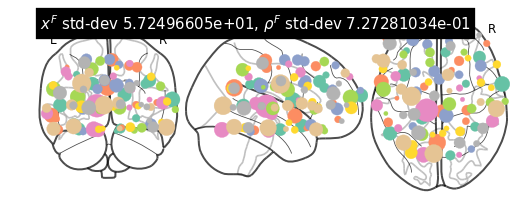

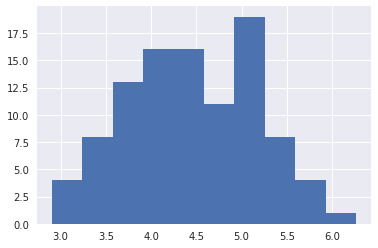

(<nilearn.plotting.displays.OrthoProjector at 0x7fd8c04dacc0>,
 tensor([[ 8.3577e+00, -2.5510e+01, -2.2831e+01],
         [-3.3269e+01,  3.9827e+01,  3.6959e+01],
         [-1.6817e+01, -3.0766e+01,  2.7306e+01],
         [ 4.3498e+01,  3.3044e+01,  3.0295e+01],
         [-5.0589e+01, -4.7044e+01,  4.5423e+00],
         [ 3.8901e+01, -4.0067e+01,  2.7040e+01],
         [ 2.9222e+01,  5.1603e+00, -9.1279e+00],
         [ 1.7146e+01,  7.6845e+01,  1.5506e+01],
         [-3.6139e+01,  1.4521e+01, -1.6266e+01],
         [-3.0885e+01, -8.2704e+00, -2.0482e+01],
         [ 1.2857e+01, -7.0167e+01, -1.9938e+01],
         [ 7.8404e+00,  3.8219e+01,  2.3544e+01],
         [ 6.7374e+01,  4.8858e+00,  1.0638e+01],
         [ 2.2061e+01,  2.9134e+01,  4.6236e+01],
         [ 5.1147e+01,  4.7540e+01,  7.3935e+00],
         [-4.3353e+01, -1.0068e+01,  4.4832e+01],
         [-5.4648e+01,  5.2489e+01, -9.7809e+00],
         [-9.0769e-01, -5.6776e+01,  2.3507e+01],
         [ 3.6437e+00, -2.3896e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=60, patience=100)

07/19/2019 14:08:47 [Epoch 1] (58100ms) Posterior free-energy 2.87404896e+08 = KL from prior 2.29373175e+06 - log-likelihood -2.85111072e+08
07/19/2019 14:08:47 Saving checkpoint...
07/19/2019 14:09:46 [Epoch 2] (58942ms) Posterior free-energy 2.71361376e+08 = KL from prior 2.21778925e+06 - log-likelihood -2.69143584e+08
07/19/2019 14:10:46 [Epoch 3] (60486ms) Posterior free-energy 2.65923920e+08 = KL from prior 2.17838850e+06 - log-likelihood -2.63745536e+08
07/19/2019 14:11:47 [Epoch 4] (60206ms) Posterior free-energy 2.63385952e+08 = KL from prior 2.14001725e+06 - log-likelihood -2.61245920e+08
07/19/2019 14:12:45 [Epoch 5] (58084ms) Posterior free-energy 2.61956576e+08 = KL from prior 2.09079625e+06 - log-likelihood -2.59865808e+08
07/19/2019 14:13:43 [Epoch 6] (57539ms) Posterior free-energy 2.60962784e+08 = KL from prior 2.02501550e+06 - log-likelihood -2.58937728e+08
07/19/2019 14:14:40 [Epoch 7] (56871ms) Posterior free-energy 2.60343216e+08 = KL from prior 1.94481550e+06 - log

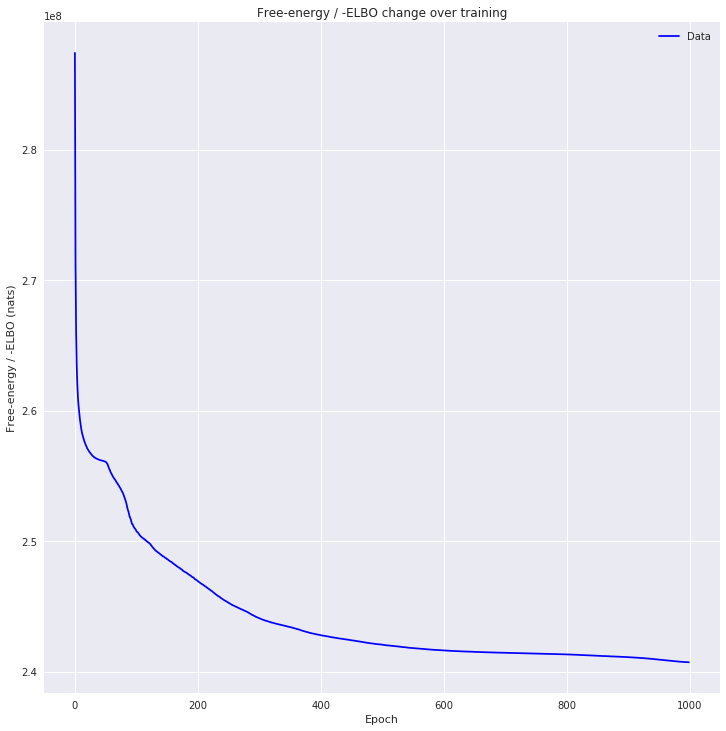

In [9]:
utils.plot_losses(losses)

In [16]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

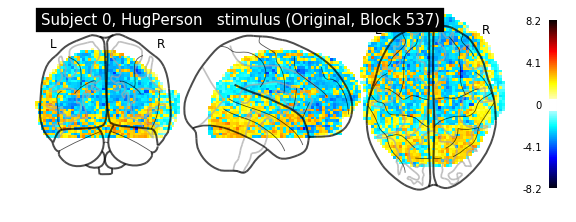

07/22/2019 11:19:52 Reconstruction Error (Frobenius Norm): 2.42727676e+02 out of 2.56051117e+02


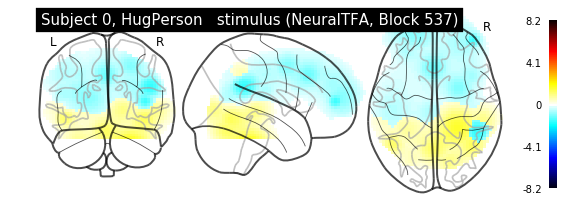

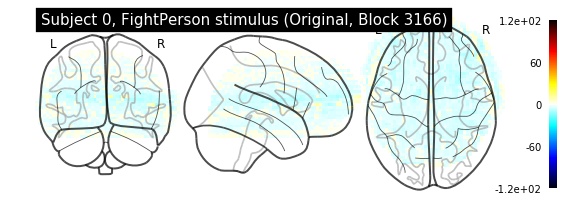

07/22/2019 11:19:54 Reconstruction Error (Frobenius Norm): 3.19157867e+02 out of 3.61642273e+02


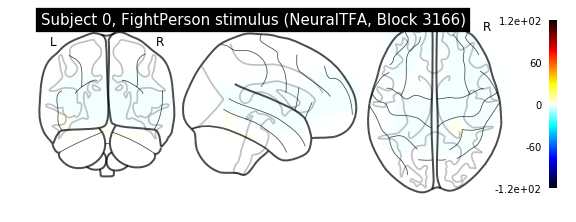

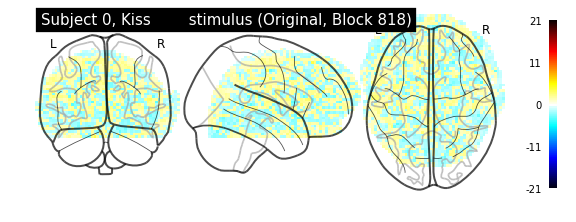

07/22/2019 11:19:57 Reconstruction Error (Frobenius Norm): 1.88117935e+02 out of 1.91189606e+02


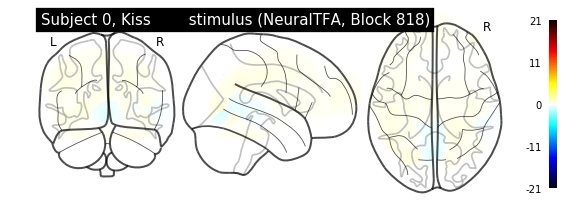

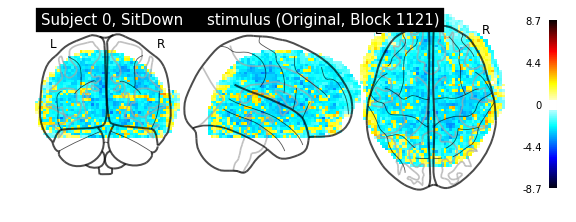

07/22/2019 11:19:59 Reconstruction Error (Frobenius Norm): 2.05670792e+02 out of 2.38148422e+02


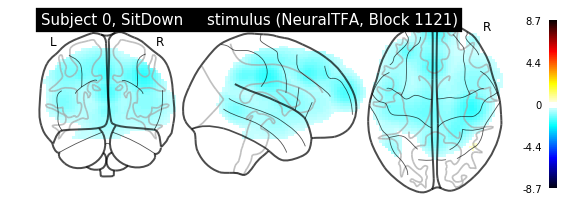

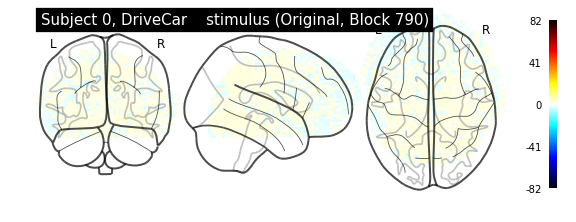

07/22/2019 11:20:01 Reconstruction Error (Frobenius Norm): 1.89272400e+02 out of 2.10061554e+02


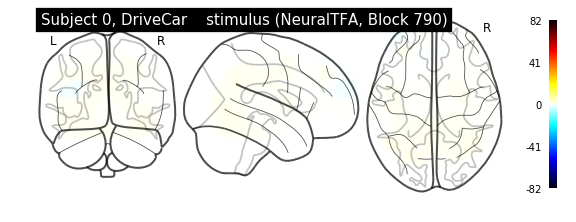

In [17]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [20]:
def task_labeler(task):
    return task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


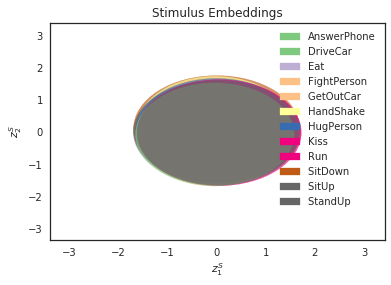

In [21]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [22]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


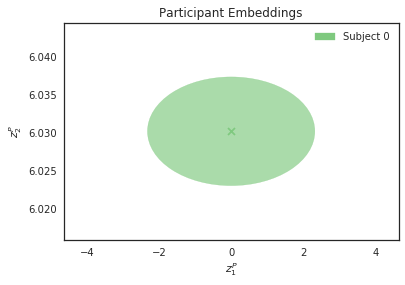

In [23]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

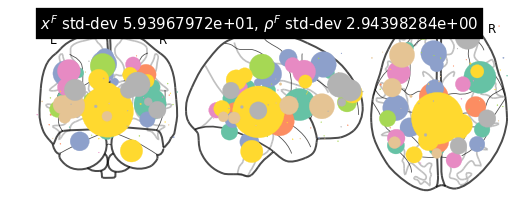

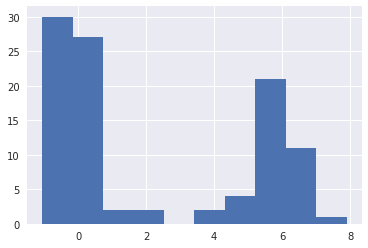

(<nilearn.plotting.displays.OrthoProjector at 0x7fd883f4f128>,
 tensor([[ 1.3623e+01, -1.4324e+01, -2.0810e+01],
         [-3.1356e+01,  4.3346e+01,  3.8675e+01],
         [-4.2377e+00, -2.1045e+01,  2.0985e+01],
         [ 4.3965e+01,  1.1876e+01,  5.8428e+00],
         [-4.4464e+01, -5.9674e+01,  1.1924e+01],
         [ 4.6247e+01, -4.3050e+01,  2.3541e+01],
         [ 3.2436e+01,  7.4726e+00, -3.9435e-01],
         [ 1.9288e+01,  7.3819e+01,  1.6140e+01],
         [-4.0851e+01,  1.4380e+00, -1.8542e+01],
         [-1.6523e+01, -9.1466e+00, -2.3073e+01],
         [-1.4854e+00, -6.1741e+01, -2.2761e+01],
         [ 7.3672e+00,  4.1848e+01,  2.7136e+01],
         [ 7.2566e+01,  1.3621e+01,  1.8417e+01],
         [ 2.9691e+01,  3.0438e+01,  5.6497e+01],
         [ 6.4145e+01,  6.5767e+01,  1.5169e+01],
         [-4.8862e+01, -1.7866e+01,  3.7432e+01],
         [-6.2162e+01,  6.2717e+01, -1.5902e+01],
         [-2.7867e-01, -5.6032e+01, -3.4824e+00],
         [-5.1346e-01, -2.4696e+01,  

In [24]:
dtfa.visualize_factor_embedding()

In [25]:
dtfa.average_reconstruction_error()

07/22/2019 11:27:44 Average reconstruction error (MSE): 9.43912449e-01
07/22/2019 11:27:44 Average data norm (Euclidean): 9.97390606e-01
07/22/2019 11:27:44 Percent average reconstruction error: 0.430999


(0.9439124489411307, 0.9973906060454779, 0.004309992932326)

In [26]:
dtfa.average_reconstruction_error(weighted=False)

07/22/2019 11:29:57 Average reconstruction error (MSE): 2.05603895e+02 +/- 3.31182695e+01
07/22/2019 11:29:57 Average data norm (Euclidean): 2.16759080e+02 +/- 3.79314876e+01
07/22/2019 11:29:57 Percent average reconstruction error: 95.047881 +/- 2.85637880e+00


(array([203.07737732, 179.06373596, 178.52264404, ..., 179.51771545,
        174.20429993, 177.9466095 ]),
 array([208.34446716, 182.10308838, 185.40319824, ..., 188.74002075,
        180.16169739, 186.94560242]),
 array([0.97471932, 0.98330972, 0.9628887 , ..., 0.95113752, 0.96693305,
        0.95186304]))